<h1><b>Airline Customer Satisfaction</b></h1>
<section>
<h2>Data Mining Project</h2>
<p>


*   Kezia Sekarayu Setyawati - C14170086
*   Andreas Wijaya - C14170095


</p>


<h3><i><b> Mounting Data </b></i></h3>
Menginput data <i>training</i> dan <i>testing</i> dari file yang sudah ada

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#ANDRE 
train_df=pd.read_csv('gdrive/My Drive/DATMIN KELOMPOK/Airline DatMin/train.csv')
#train_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Airline DatMin/train.csv')
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
#ANDRE
test_df=pd.read_csv('gdrive/My Drive/DATMIN KELOMPOK/Airline DatMin/test.csv')
#test_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Airline DatMin/test.csv')
test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


<h3><i><b> Cleaning Data </b></i></h3>
Menghapus kolom yang tidak diperlukan dan data yang tidak lengkap

In [ ]:
train_df = train_df.drop(['Unnamed: 0', 'id'], axis = 1)
test_df = test_df.drop(['Unnamed: 0', 'id'], axis = 1)
train_df = train_df.dropna()
test_df = test_df.dropna()
test_df.head()
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


<h3><i><b> Normalization and Transformation Data </b></i></h3>
Melakukan normalisasi data dengan mengubah nilai dari variabel sehingga nilainya setara dan normal. Dikritisasi juga dilakukan untuk memudahkan pengolahan data

In [ ]:
def transform_gender(x):
  if x == 'Female':
    return 1
  elif x == 'Male':
    return 0
  else:
    return -1

def transform_customer_type(x):
  if x == 'Loyal Customer':
    return 1
  elif x == 'disloyal Customer':
    return 0
  else:
    return -1
    
def transform_travel_type(x):
  if x == 'Business travel':
    return 1
  elif x == 'Personal Travel':
    return 0
  else:
    return -1
    
def transform_class(x):
  if x == 'Business':
    return 2
  elif x == 'Eco Plus':
    return 1
  elif x == 'Eco':      
    return 0    
  else:
    return -1
    
def transform_satisfaction(x):
  if x == 'satisfied':
    return 1
  elif x == 'neutral or dissatisfied':
    return 0
  else:
    return -1

#https://en.wikipedia.org/wiki/Flight_length
def transform_flightDisctance(x):
  if x <= 700:
    return 0
  elif x > 700 and x <= 3000:
    return 1
  elif x > 3000:
    return 2
  else:
    return -1

#https://en.wikipedia.org/wiki/Flight_cancellation_and_delay#:~:text=A%20flight%20delay%20is%20when,all%20for%20a%20certain%20reason.
def transform_Delays(x):
  if x <= 15:
    return 5
  elif x > 15 and x <= 45:
    return 3
  elif x > 45:
    return 1
  else:
    return -1

train_df['Gender'] = train_df['Gender'].apply(transform_gender)
train_df['Customer Type'] = train_df['Customer Type'].apply(transform_customer_type)
train_df['Type of Travel'] = train_df['Type of Travel'].apply(transform_travel_type)
train_df['Class'] = train_df['Class'].apply(transform_class)
train_df['satisfaction'] = train_df['satisfaction'].apply(transform_satisfaction)
train_df['Flight Distance'] = train_df['Flight Distance'].apply(transform_flightDisctance)
train_df['Departure Delay in Minutes'] = train_df['Departure Delay in Minutes'].apply(transform_Delays)
train_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].apply(transform_Delays)

test_df['Gender'] = test_df['Gender'].apply(transform_gender)
test_df['Customer Type'] = test_df['Customer Type'].apply(transform_customer_type)
test_df['Type of Travel'] = test_df['Type of Travel'].apply(transform_travel_type)
test_df['Class'] = test_df['Class'].apply(transform_class)
test_df['satisfaction'] = test_df['satisfaction'].apply(transform_satisfaction)
test_df['Flight Distance'] = test_df['Flight Distance'].apply(transform_flightDisctance)
test_df['Departure Delay in Minutes'] = test_df['Departure Delay in Minutes'].apply(transform_Delays)
test_df['Arrival Delay in Minutes'] = test_df['Arrival Delay in Minutes'].apply(transform_Delays)

test_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,52,1,0,0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,1,3,1
1,1,1,36,1,2,1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,5,5,1
2,0,0,20,1,0,0,2,0,2,4,2,2,2,2,4,1,3,2,2,2,5,5,0
3,0,1,44,1,2,2,0,0,0,2,3,4,4,1,1,1,1,3,1,4,5,5,1
4,1,1,49,1,0,1,2,3,4,3,4,1,2,2,2,2,2,4,2,4,5,3,1


In [ ]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,3,3,0
1,0,0,25,1,2,0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,5,5,0
2,1,1,26,1,2,1,2,2,2,2,5,5,5,5,4,3,4,4,4,5,5,5,1
3,1,1,25,1,2,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,5,5,0
4,0,1,61,1,2,0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,5,5,1


# ***Normalized Dataset via StandardScaler***

In [ ]:
from sklearn.preprocessing import StandardScaler
features_df = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target_df = ['satisfaction']

x_train_df = train_df[features_df]
y_train_df = train_df[target_df].to_numpy()
x_test_df = test_df[features_df]
y_test_df = test_df[target_df].to_numpy()

scaler = StandardScaler()
x_train_df = scaler.fit_transform(x_train_df)
x_test_df = scaler.fit_transform(x_test_df)

<h2> <b> <i>  Model Making </i> </b> </h2>
Proses training data dan penghitungan akurasi dari hasil prediksi

Accuracy: 0.9632333062989997
ROC_AUC = 0.9609618170158788
              precision    recall  f1-score   support

           0    0.95600   0.97956   0.96763     14528
           1    0.97302   0.94237   0.95745     11365

    accuracy                        0.96323     25893
   macro avg    0.96451   0.96096   0.96254     25893
weighted avg    0.96347   0.96323   0.96316     25893



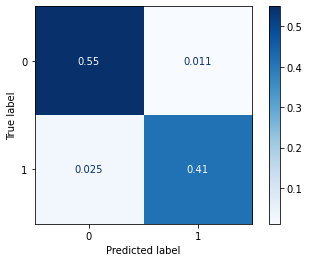

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#Create a Random Forest Classifier
rf_model=RandomForestClassifier(max_depth = 25,
                                min_samples_leaf = 1,
                                min_samples_split = 2,
                                n_estimators = 1200,
                                random_state = 42)

#Train the model using the training sets
rf_model.fit(x_train_df,y_train_df.ravel())

# prediction on test set
y_pred=rf_model.predict(x_test_df)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_df, y_pred))
roc_auc = roc_auc_score(y_test_df, y_pred)
print("ROC_AUC = {}".format(roc_auc))
print(classification_report(y_test_df,y_pred,digits=5))
plot_confusion_matrix(rf_model, x_test_df, y_test_df,cmap=plt.cm.Blues, normalize = 'all')

## ***Correlation HeatMap***

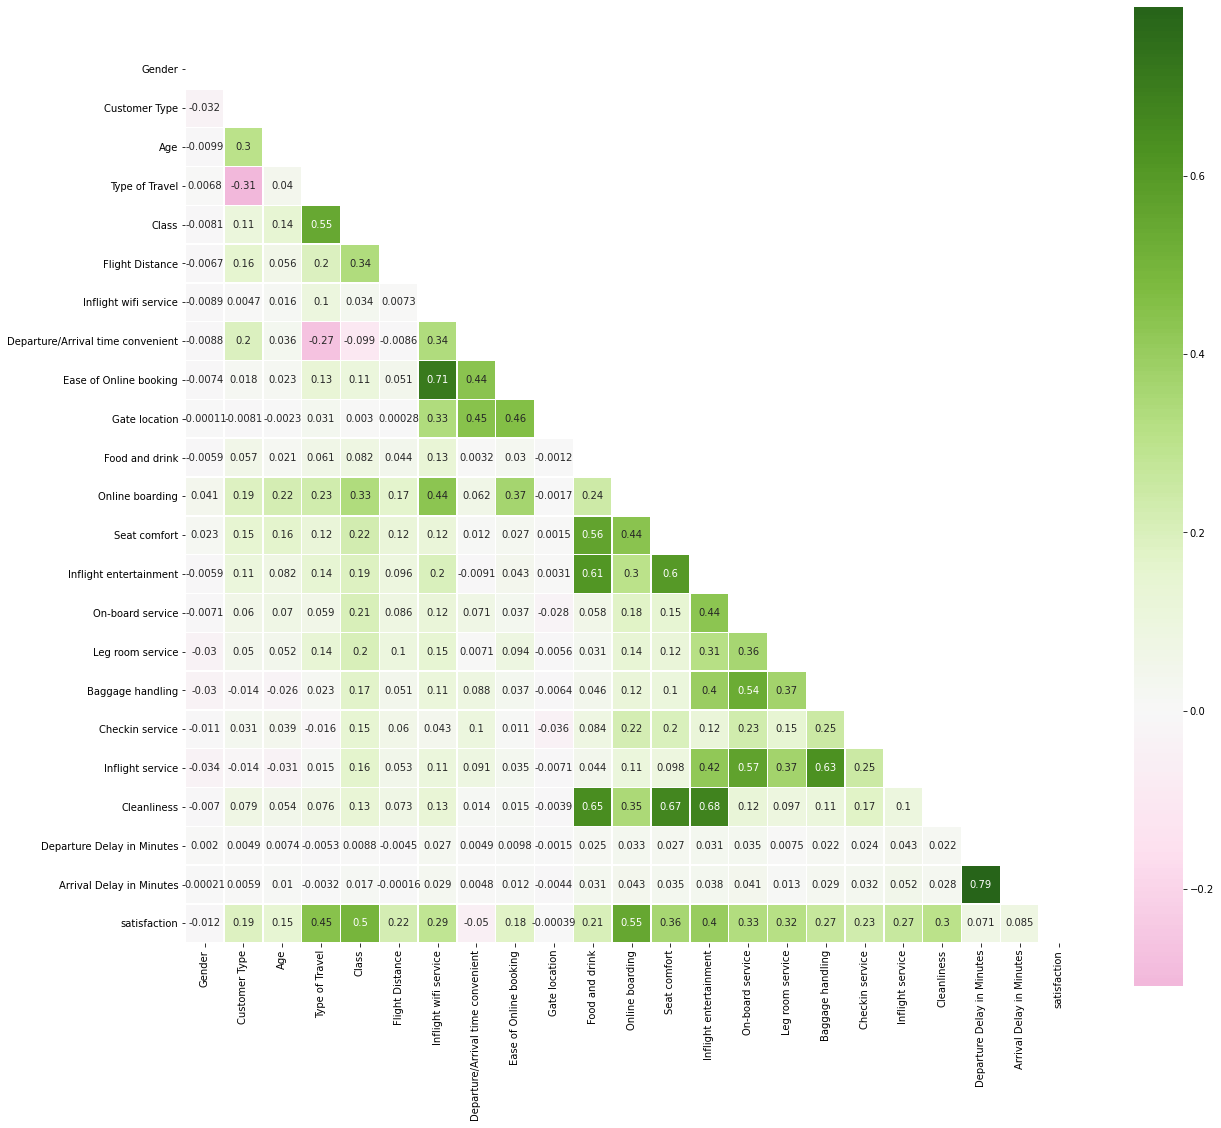

In [ ]:
import numpy as np
import seaborn as sns

corr = train_df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="PiYG", center=0,
            square=True, linewidths=.5)

<h2><b><i>Data Analysis</i></b></h2>

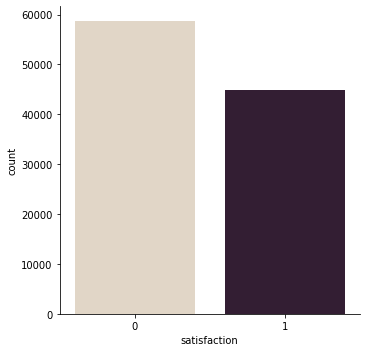

In [ ]:
sns.catplot(x="satisfaction", kind="count", palette="ch:.25", data=train_df);

## ***Berdasarkan Data Analysis, hal yang perlu dipertahankan***

In [ ]:
print("Best Features : ")
print(corr.satisfaction.sort_values(ascending=False).iloc[1:6])

Best Features : 
Online boarding           0.550898
Class                     0.495254
Type of Travel            0.448995
Inflight entertainment    0.399658
Seat comfort              0.361879
Name: satisfaction, dtype: float64


## ***Berdasarkan Data Analysis, hal yang perlu ditingkatkan***

In [ ]:
print("Bad Features : ")
print(corr.satisfaction.sort_values(ascending=False).iloc[22:23])

Bad Features : 
Departure/Arrival time convenient   -0.049701
Name: satisfaction, dtype: float64


<h2><b><i> Try to Input New Data </i></b></h2>
Data baru diuji coba untuk di prediksi hasilnya oleh model yang sudah dibuat

In [ ]:
#Satisfied
new_data = [1,1,52,1,0,0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,2,1]
print("Result :", rf_model.predict([new_data]))


Result : [1]


In [ ]:
#Disatisfied
new_data = [0,1,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2]
print("Result :", rf_model.predict([new_data]))

Result : [0]


## ***Contoh Input***

In [ ]:
gender = input("Gender (Male/Female) : " )
customertype = input("Customer Type (Loyal Customer/disloyal Customer) : " )
age = input("Age : " )
typetravel = input("Type of Travel (Business Travel/Personal Travel) : " )
classs = input("Class (Business/Eco Plus/Eco) : " )
flightdistance = input("Flight Distance : " )
inflightwifi = input("Inflight wifi service (1-5): " )
timeconv = input("Departure/Arrival time convenient (1-5) : " )
ease = input("Ease of Online booking (1-5) : " )
gateloc = input("Gate location (1-5) : " )
fnd = input("Food and drink (1-5) : " )
onlineboard = input("Online boarding (1-5) : " )
seatcom = input("Seat comfort (1-5) : " )
inflightentertain = input("Inflight entertainment (1-5) : " )
onboardserv = input("On-board service (1-5) : " )
legroomserv = input("Leg room service (1-5) : " )
baggagehand = input("Baggage handling (1-5) : " )
checkinserv = input("Checkin service (1-5) : " )
inflightserv = input("Inflight service (1-5) : " )
cleanlines = input("Cleanliness (1-5) : " )
depdelay = input("Departure Delay in Minutes : " )
arrdelay = input("Arrival Delay in Minutes : " )

if gender == 'Female':
  gender = '1'
elif gender == 'Male':
  gender = '0'
else:
  gender = '-1'

if customertype == 'Loyal Customer':
  customertype = '1'
elif customertype == 'disloyal Customer':
  customertype = '0'
else:
  customertype = '-1'
    
if typetravel == 'Business travel':
  typetravel = '1'
elif typetravel == 'Personal Travel':
  typetravel = '0'
else:
  typetravel = '-1'
    
if classs == 'Business':
  classs = '2'
elif classs == 'Eco Plus':
  classs = '1'
elif classs == 'Eco':      
  classs = '0'
else:
  classs = '-1'
    
if int(flightdistance) <= 700:
  flightdistance = '0'
elif int(flightdistance) > 700 and int(flightdistance) <= 3000:
  flightdistance = '1'
elif int(flightdistance) > 3000:
  flightdistance = '2'
else:
  flightdistance = '-1'

if int(depdelay) <= 15:
  depdelay = '5'
elif int(depdelay) > 15 and int(depdelay) <= 45:
  depdelay = '3'
elif int(depdelay) > 45:
  depdelay = '1'
else:
  depdelay = '-1'

if int(arrdelay) <= 15:
  arrdelay = '5'
elif int(arrdelay) > 15 and int(arrdelay) <= 45:
  arrdelay = '3'
elif int(arrdelay) > 45:
  arrdelay = '1'
else:
  arrdelay = '-1'

new_data = [int(gender),int(customertype),int(age),int(typetravel),int(classs),int(flightdistance),int(inflightwifi),int(timeconv),int(ease),int(gateloc),int(fnd),int(onlineboard),int(seatcom),int(inflightentertain),int(onboardserv),int(legroomserv),int(baggagehand),int(checkinserv),int(inflightserv),int(cleanlines),int(depdelay),int(arrdelay)]
print("Result :", rf_model.predict([new_data]))

Gender (Male/Female) : Male
Customer Type (Loyal Customer/disloyal Customer) : Loyal Customer
Age : 20
Type of Travel (Business Travel/Personal Travel) : Business Travel
Class (Business/Eco Plus/Eco) : Eco
Flight Distance : 200
Inflight wifi service (1-5): 1
Departure/Arrival time convenient (1-5) : 1
Ease of Online booking (1-5) : 1
Gate location (1-5) : 1
Food and drink (1-5) : 1
Online boarding (1-5) : 1
Seat comfort (1-5) : 1
Inflight entertainment (1-5) : 1
On-board service (1-5) : 1
Leg room service (1-5) : 1
Baggage handling (1-5) : 1
Checkin service (1-5) : 1
Inflight service (1-5) : 1
Cleanliness (1-5) : 1
Departure Delay in Minutes : 50
Arrival Delay in Minutes : 50
Result : [0]
